In [27]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.dates as mdates
import matplotlib.ticker as mtick

In [28]:
dataDir = 'data'
dataFile = 'data/TotalesPorRegion.csv'
dataURL = "https://github.com/MinCiencia/Datos-COVID19/raw/master/output/producto3/TotalesPorRegion.csv"

r = requests.get(dataURL)

with open(dataFile, 'wb') as f:
    f.write(r.content)

In [46]:
dataDF = pd.read_csv(dataFile)
dataDF.head()

,Region,Categoria,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,...,2021-01-11,2021-01-12,2021-01-13,2021-01-14,2021-01-15,2021-01-16,2021-01-17,2021-01-18,2021-01-19,2021-01-20
0,Arica y Parinacota,Casos acumulados,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11341,11389,11422,11519,11579,11664,11780,11876,11939,11982
1,Tarapacá,Casos acumulados,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17513,17715,17907,18186,18426,18573,18804,19003,19178,19418
2,Antofagasta,Casos acumulados,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25737,25951,26142,26345,26575,27007,27406,27762,28110,28282
3,Atacama,Casos acumulados,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8829,8919,8985,9038,9095,9178,9236,9291,9336,9376
4,Coquimbo,Casos acumulados,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14918,14986,15053,15128,15240,15334,15402,15491,15587,15683


In [47]:
dataDF = dataDF.melt(id_vars=["Region", "Categoria"],
                    var_name="Date",
                    value_name="Value")

dataDF.head()

,Region,Categoria,Date,Value
0,Arica y Parinacota,Casos acumulados,2020-03-03,0.0
1,Tarapacá,Casos acumulados,2020-03-03,0.0
2,Antofagasta,Casos acumulados,2020-03-03,0.0
3,Atacama,Casos acumulados,2020-03-03,0.0
4,Coquimbo,Casos acumulados,2020-03-03,0.0


In [48]:
dataDF = dataDF.pivot_table(index='Date', columns=['Region','Categoria'], values='Value')
dataDF.head()

Region                   Antofagasta                                           \
Categoria  Casos activos confirmados Casos activos probables Casos acumulados   
Date                                                                            
2020-03-03                       NaN                     NaN              0.0   
2020-03-04                       NaN                     NaN              0.0   
2020-03-05                       NaN                     NaN              0.0   
2020-03-06                       NaN                     NaN              0.0   
2020-03-07                       NaN                     NaN              0.0   

Region                                                              \
Categoria  Casos confirmados recuperados Casos nuevos con sintomas   
Date                                                                 
2020-03-03                           NaN                       0.0   
2020-03-04                           NaN                       0.0   
2020-03-05                           NaN                       0.0   
2020-03-06                           NaN                       0.0   
2020-03-07                           NaN                       0.0   

Region                                                           \
Categoria  Casos nuevos sin notificar Casos nuevos sin sintomas   
Date                                                              
2020-03-03                        NaN                       NaN   
2020-03-04                        NaN                       NaN   
2020-03-05                        NaN                       NaN   
2020-03-06                        NaN                       NaN   
2020-03-07                        NaN                       NaN   

Region                                                                         \
Categoria  Casos nuevos totales Casos probables acumulados Fallecidos totales   
Date                                                                            
2020-03-03                  0.0                        NaN                NaN   
2020-03-04                  0.0                        NaN                NaN   
2020-03-05                  0.0                        NaN                NaN   
2020-03-06                  0.0                        NaN                NaN   
2020-03-07                  0.0                        NaN                NaN   

Region      ...                     Ñuble                          \
Categoria   ... Casos activos confirmados Casos activos probables   
Date        ...                                                     
2020-03-03  ...                       NaN                     NaN   
2020-03-04  ...                       NaN                     NaN   
2020-03-05  ...                       NaN                     NaN   
2020-03-06  ...                       NaN                     NaN   
2020-03-07  ...                       NaN                     NaN   

Region                                                     \
Categoria  Casos acumulados Casos confirmados recuperados   
Date                                                        
2020-03-03              0.0                           NaN   
2020-03-04              0.0                           NaN   
2020-03-05              0.0                           NaN   
2020-03-06              0.0                           NaN   
2020-03-07              0.0                           NaN   

Region                                                           \
Categoria  Casos nuevos con sintomas Casos nuevos sin notificar   
Date                                                              
2020-03-03                       0.0                        NaN   
2020-03-04                       0.0                        NaN   
2020-03-05                       0.0                        NaN   
2020-03-06                       0.0                        NaN   
2020-03-07                       0.0                        NaN   

Region                   

In [50]:
dataDF.index = pd.to_datetime(dataDF.index)

In [51]:
dataDF.index

DatetimeIndex(['2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06',
               '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10',
               '2020-03-11', '2020-03-12',
               ...
               '2021-01-11', '2021-01-12', '2021-01-13', '2021-01-14',
               '2021-01-15', '2021-01-16', '2021-01-17', '2021-01-18',
               '2021-01-19', '2021-01-20'],
              dtype='datetime64[ns]', name='Date', length=324, freq=None)

In [52]:
dataDF.columns

MultiIndex([('Antofagasta',     'Casos activos confirmados'),
            ('Antofagasta',       'Casos activos probables'),
            ('Antofagasta',              'Casos acumulados'),
            ('Antofagasta', 'Casos confirmados recuperados'),
            ('Antofagasta',     'Casos nuevos con sintomas'),
            ('Antofagasta',    'Casos nuevos sin notificar'),
            ('Antofagasta',     'Casos nuevos sin sintomas'),
            ('Antofagasta',          'Casos nuevos totales'),
            ('Antofagasta',    'Casos probables acumulados'),
            ('Antofagasta',            'Fallecidos totales'),
            ...
            (      'Ñuble',     'Casos activos confirmados'),
            (      'Ñuble',       'Casos activos probables'),
            (      'Ñuble',              'Casos acumulados'),
            (      'Ñuble', 'Casos confirmados recuperados'),
            (      'Ñuble',     'Casos nuevos con sintomas'),
            (      'Ñuble',    'Casos nuevos sin notif

## Analisis de Arica y Parinacota

In [56]:
plotDF = pd.DataFrame(dataDF['Arica y Parinacota']['Casos nuevos totales'])
plotDF['MAV7'] = plotDF['Casos nuevos totales'].rolling(window=5).mean()
plotDF['MAV7_NORM'] = plotDF['MAV7']/239126*1e5
plotDF.head()

,Casos nuevos totales,MAV7,MAV7_NORM
Date,,,
2020-03-03,0.0,NaN,NaN
2020-03-04,0.0,NaN,NaN
2020-03-05,0.0,NaN,NaN
2020-03-06,0.0,NaN,NaN
2020-03-07,0.0,0.0,0.0


Text(0, 0.5, 'Casos diarios por 100 mil hab')

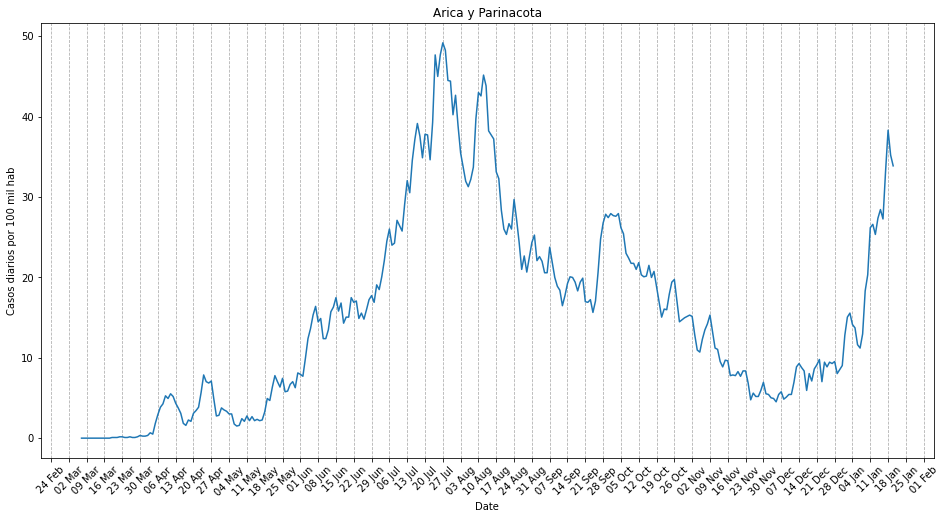

In [57]:
fig, ax = plt.subplots(figsize = (16,8))
sns.lineplot(x=plotDF.index, y='MAV7_NORM', data=plotDF, ax=ax)

ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO, interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
ax.xaxis.set_tick_params(rotation=45)
ax.xaxis.grid(True, linestyle='--')

plt.title("Arica y Parinacota")
plt.ylabel('Casos diarios por 100 mil hab')

## Analisis de Tarapaca

In [58]:
plotDF = pd.DataFrame(dataDF['Tarapacá']['Casos nuevos totales'])
plotDF['MAV7'] = plotDF['Casos nuevos totales'].rolling(window=5).mean()
plotDF['MAV7_NORM'] = plotDF['MAV7']/209501*1e5
plotDF.head()

,Casos nuevos totales,MAV7,MAV7_NORM
Date,,,
2020-03-03,0.0,NaN,NaN
2020-03-04,0.0,NaN,NaN
2020-03-05,0.0,NaN,NaN
2020-03-06,0.0,NaN,NaN
2020-03-07,0.0,0.0,0.0


Text(0, 0.5, 'Casos diarios por 100 mil hab')

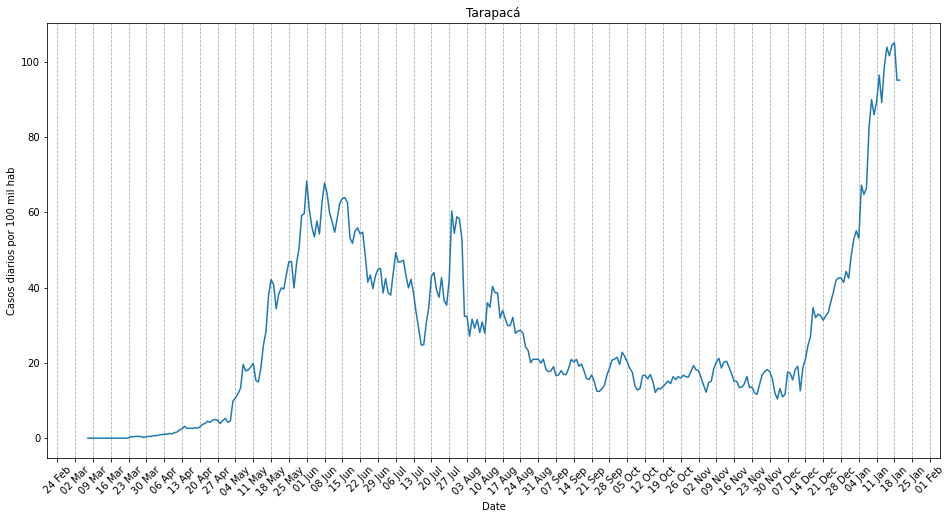

In [59]:
fig, ax = plt.subplots(figsize = (16,8))
sns.lineplot(x=plotDF.index, y='MAV7_NORM', data=plotDF, ax=ax)

ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO, interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
ax.xaxis.set_tick_params(rotation=45)
ax.xaxis.grid(True, linestyle='--')

plt.title("Tarapacá")
plt.ylabel('Casos diarios por 100 mil hab')

## Analisis de Region metropolitana

In [60]:
plotDF = pd.DataFrame(dataDF['Metropolitana']['Casos nuevos totales'])
plotDF['MAV7'] = plotDF['Casos nuevos totales'].rolling(window=5).mean()
plotDF['MAV7_NORM'] = plotDF['MAV7']/7307000*1e5
plotDF.head()

,Casos nuevos totales,MAV7,MAV7_NORM
Date,,,
2020-03-03,0.0,NaN,NaN
2020-03-04,1.0,NaN,NaN
2020-03-05,1.0,NaN,NaN
2020-03-06,1.0,NaN,NaN
2020-03-07,1.0,0.8,0.010948


Text(0, 0.5, 'Casos diarios por 100 mil hab')

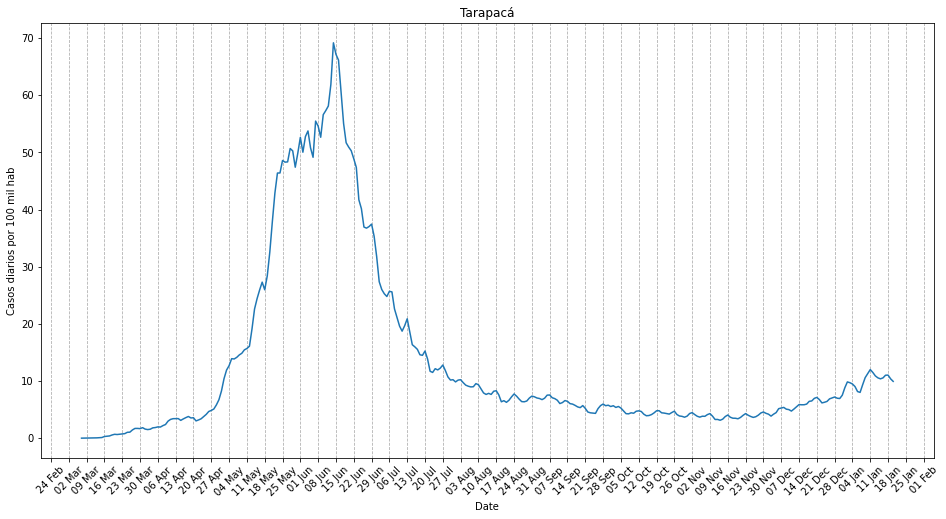

In [61]:
fig, ax = plt.subplots(figsize = (16,8))
sns.lineplot(x=plotDF.index, y='MAV7_NORM', data=plotDF, ax=ax)

ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO, interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
ax.xaxis.set_tick_params(rotation=45)
ax.xaxis.grid(True, linestyle='--')

plt.title("Tarapacá")
plt.ylabel('Casos diarios por 100 mil hab')